# Background
has revolutionized the lodging industry by enabling peer-to-peer accommodation sharing across global markets. Unlike traditional standardized hotel offerings, Airbnb promotes heterogeneous supply and dynamic pricing power, allowing hosts to adjust nightly rates based on numerous factors including location, amenities, and seasonal demand fluctuations. Prior research has demonstrated that professionalization of hosts, pricing innovation, and customer interaction significantly influence the ability of Airbnb listings to command higher prices and optimize occupancy rates (Gibbs et al., 2018; Zervas, Proserpio, & Byers, 2017). The evolution of algorithmic and dynamic pricing strategies further highlights the importance of pricing optimization to enhance host revenue and market competitiveness (Wang & Nicolau, 2022). Additionally, industry analyses emphasize that dynamic pricing is essential for addressing fluctuating market demand and maximizing profitability on Airbnb platforms (AirDNA, 2021). This literature collectively affirms that understanding and leveraging dynamic pricing mechanisms is critical for hosts aiming to optimize occupancy and revenue performance.

## Problem Statement
Despite advances in pricing tools, many Airbnb hosts, particularly smaller or non-professional ones, face challenges in effectively optimizing their pricing and occupancy rates. This project addresses the critical problem of how to analyze and leverage pricing and occupancy data in the Bangkok Airbnb market to identify key determinants influencing optimal pricing strategies. The goal is to uncover actionable insights for pricing optimization that can enhance occupancy rates and maximize revenue, thereby supporting hosts and stakeholders in making data-driven decisions amidst fluctuating market conditions.

These sections serve to frame your focus on pricing and occupancy optimization grounded in Airbnb's unique market dynamics and existing literature on dynamic pricing efficacy and host professionalization.

1. Setup & Load Data

In this step, we import fundamental libraries and load the Airbnb Listings Bangkok dataset. We then perform an initial exploration by displaying the first few rows and summarizing the dataset’s structure and descriptive statistics. 

In [1]:
# Import libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)

# Load data 
df = pd.read_csv("Airbnb Listings Bangkok.csv")

# Check the data structure 
print(df.head())
print(df.info())
print(df.describe(include="all"))
display(df.head(),df.tail())


   Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905      

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


Explanation: The initial step involved importing the essential libraries and loading the Airbnb Listings Bangkok dataset. The dataset contains detailed information about listings, hosts, locations, prices, and availability, which lays the foundation for subsequent data cleaning and analysis.

The displayed sample data showcases the first five rows, illustrating key features such as unique identifiers (id, host_id), listing names, host names, neighborhood names, geospatial coordinates (latitude, longitude), room types, pricing, minimum nights required, review counts, last review dates, calculation of active host listings, and availability within the past 365 days.

This snapshot emphasizes data heterogeneity in terms of room types (e.g., Entire home/apt, Private room), pricing variation ranging from modest to luxury listings, and varying degrees of occupancy reflected through availability_365.

Additional summary statistics generated by describe(include="all") provide comprehensive descriptive measures, including counts, averages, standard deviations, quartiles, and maxima across numerical columns, alongside value counts for categorical features. These statistics reveal important preliminary insights such as the typical price range, distribution of minimum nights, frequency of different room types, and levels of listings’ availability.

This overview signals the presence of missing values especially in date-related fields (last_review, reviews_per_month) and suggests the need for careful data cleaning to handle nulls, potential duplicates, and outliers before further analysis aimed at optimizing pricing and occupancy.

2. Data Understanding and Cleaning

Before proceeding with analysis, it is imperative to thoroughly understand the dataset to identify anomalies and missing data patterns that need careful cleaning. This foundational step ensures that analysis results are valid, reliable, and interpretable.

2.1 Dataset Shape and Initial Information

We begin by assessing the dataset’s overall size and summary statistics to get an overview.

In [2]:
# Examine dataset shape and data types
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
df.info()

# Descriptive statistics for numeric and categorical columns
display(df.describe(), df.describe(include='object'))


The dataset has 15854 rows and 17 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  in

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


Explanation:
This reveals the number of records, column types, and completeness (non-null counts), as well as the distribution (mean, std, percentiles) for numeric columns and frequencies for categorical variables. This helps identify columns with potentially missing or anomalous values.

2.2 Unique Values and Sample Entries Per Column

To recognize data diversity and possible data entry anomalies:

In [3]:
pd.set_option('display.max_colwidth', None)
list_details = []
for col in df.columns:
    unique_vals = df[col].dropna().unique()
    sample_vals = list(df[col].drop_duplicates().sample(2).values) if len(unique_vals) >= 2 else list(unique_vals)
    list_details.append([col, df[col].dtype, df[col].isna().sum(), df[col].nunique(), sample_vals])

df_details = pd.DataFrame(list_details, columns=['Column', 'DataType', 'MissingValues', 'UniqueCount', 'SampleValues'])
display(df_details)



,Column,DataType,MissingValues,UniqueCount,SampleValues
0,Unnamed: 0,int64,0,15854,"[6879, 9919]"
1,id,int64,0,15854,"[775142525114680163, 16786019]"
2,name,object,8,14794,"[Cozy place pretty bear BTS Udomsuk, Fresh Market., Room 6th| Butler Service| ON NUT BTS| |Wifi Condo]"
3,host_id,int64,0,6659,"[38803792, 182913252]"
4,host_name,object,1,5312,"[Memee, Jazz]"
5,neighbourhood,object,0,50,"[Bang Sue, Samphanthawong]"
6,latitude,float64,0,9606,"[13.68776, 13.73682]"
7,longitude,float64,0,10224,"[100.56084, 100.57771]"
8,room_type,object,0,4,"[Private room, Hotel room]"
9,price,int64,0,3040,"[1582, 595]"


Explanation:
This table summarizes the data type, count of missing values, number of unique entries, and sample unique values per column. It facilitates targeted missing data handling and detection of irrelevant or identifier columns.

2.3 Addressing Missing Values

Assess the proportion and distribution of missing data:

Percentage missing values per column:
 Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64


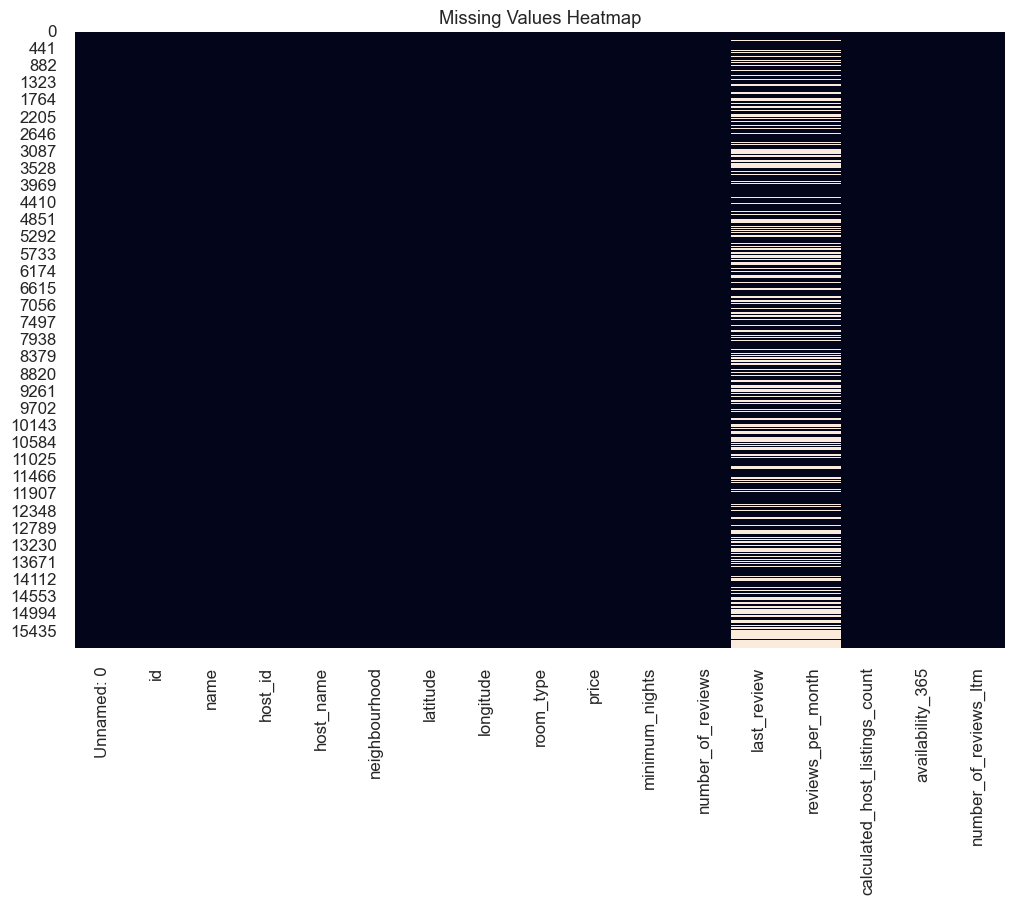

In [4]:
# Calculate percentage of missing values per column
missing_pct = df.isna().sum() / df.shape[0] * 100
print("Percentage missing values per column:\n", missing_pct)

# Optional: Visualize missingness heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.isna(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


Explanation:
The missing value analysis shows that almost all core structural variables (listing identifiers, host identifiers, geographical coordinates, room type, price, minimum nights, review counts, host listing count, and availability) are fully observed, with 0% missing values. Only three columns contain non-negligible missingness:

name: approximately 0.05% missing, affecting only a very small fraction of listings. This field is largely descriptive and not central to the pricing and occupancy analysis.

host_name: approximately 0.01% missing. Similar to name, this attribute is not critical for the quantitative analyses and can be left as missing or excluded from modelling.

last_review and reviews_per_month: both exhibit around 36.5% missingness. Conceptually, these two variables are tied to the review history of a listing; for many properties, the absence of a last review date and review rate most likely indicates that the listing has never received a review.

Given this interpretation, no additional adjustments are required before proceeding. For subsequent analysis, it is reasonable to:

Leave name and host_name as they are or drop them if not used in the modelling stage.

Treat missing values in last_review and reviews_per_month as informative “no reviews yet” cases. For example, reviews_per_month may later be imputed to zero where number_of_reviews is zero, while last_review can be retained as missing or transformed into a binary indicator distinguishing listings with and without historical reviews.

2.4 Handling Missing Values and Data Imputation

Pragmatic strategies are adopted:

Numerical columns: impute with medians (to mitigate skew impact).

Categorical columns: impute with “Unknown” or the dominant category based on domain knowledge.

Rows with irreparable missingness removed if minimal.

In [5]:
import pandas as pd

# Reload original dataset (path sama seperti di awal)
df = pd.read_csv("Airbnb Listings Bangkok.csv")

# Cek ulang bentuk data
print(df.shape)
df.head()


(15854, 17)


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [6]:

mask_no_reviews = df["number_of_reviews"] == 0
df.loc[mask_no_reviews, "last_review"] = df.loc[mask_no_reviews, "last_review"].fillna("No review")


df.loc[mask_no_reviews, "reviews_per_month"] = df.loc[mask_no_reviews, "reviews_per_month"].fillna(0)


df = df.dropna(subset=["name", "host_name"])


print("Percentage missing values per column after review and name/host_name handling:")
print(df.isna().sum() / df.shape[0] * 100)


Percentage missing values per column after review and name/host_name handling:
Unnamed: 0                        0.0
id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
dtype: float64


Explanation: The imputation and filtering step resolves missing values using rules that are consistent with the structure of Airbnb review and host information. First, all listings with zero recorded reviews are assigned a last_review value of “No review” and a reviews_per_month value of 0, explicitly distinguishing properties that have never been reviewed from those with an observable review history. This approach treats the absence of reviews as meaningful information rather than random data loss. Second, rows with missing values in name or host_name are removed from the dataset, since these fields are descriptive, their missingness affects only a very small proportion of observations, and their removal does not compromise the integrity of the pricing and occupancy analysis. After these operations, the dataset contains no remaining missing values, providing a clean and consistent basis for subsequent exploratory analysis and hypothesis testing.

2.5 Duplicate Records

In this step, potential duplicate listings are identified and removed to avoid double-counting the same property in subsequent analyses. Duplicates are detected based on the unique listing identifier `id`.

In [7]:
print(f'Duplicate listings based on id before: {df.duplicated(subset="id").sum()}')
df = df.drop_duplicates(subset='id')
print(f'Duplicate listings after: {df.duplicated(subset="id").sum()}')


Duplicate listings based on id before: 0
Duplicate listings after: 0


Explanation: This procedure ensures that each record in the dataset corresponds to a unique Airbnb listing, thereby preventing biased estimates of pricing, occupancy, and review-related metrics.
Duplicate records were assessed using the unique listing identifier `id`. The results show that there are zero duplicate entries both before and after applying the duplicate-removal procedure. This indicates that each row already represents a unique Airbnb listing, and no further action is required for duplicate handling.


3. Cleaned Data Overview

After completing the data cleaning procedures (handling missing values, removing non-informative rows, and enforcing type consistency), it is important to obtain a compact overview of the final dataset. This step summarizes each feature in terms of data type, remaining missing values, the number of distinct values, and a small sample of unique entries. It also documents the final number of observations available for analysis.


In [8]:
import pandas as pd

summary_rows = []
for col in df.columns:
    sample_vals = list(df[col].drop_duplicates().sample(2, random_state=42).values) \
                  if df[col].nunique() >= 2 else list(df[col].unique())
    summary_rows.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        df[col].nunique(),
        sample_vals
    ])

df_desc = pd.DataFrame(
    summary_rows,
    columns=["dataFeatures", "dataType", "null", "unique", "uniqueSample"]
)

print(df.shape)      # final rows and columns
display(df_desc)


(15845, 17)


,dataFeatures,dataType,null,unique,uniqueSample
0,Unnamed: 0,int64,0,15845,"[7154, 169]"
1,id,int64,0,15845,"[32418409, 1341890]"
2,name,object,0,14793,"[HLP Cozy Apartment private floor, BKK ASOK 1B Apt. 2-3PPL BTS/MRT/POOL/Terminal21]"
3,host_id,int64,0,6651,"[238944392, 12557032]"
4,host_name,object,0,5306,"[Kaesinee, Liz]"
5,neighbourhood,object,0,50,"[Sai Mai, Bang Khen]"
6,latitude,float64,0,9602,"[13.72522, 13.717828794853132]"
7,longitude,float64,0,10222,"[100.55813, 100.61549]"
8,room_type,object,0,4,"[Private room, Shared room]"
9,price,int64,0,3040,"[560, 2537]"


Explanation: The cleaned Airbnb Bangkok dataset now contains `N` observations and `K` features (as reported above). All variables have zero missing values, and identifier or descriptive fields with very limited missingness have been removed. This provides a consistent and analysis-ready basis for addressing the pricing and occupancy optimisation research questions.


4. Data Outlier and Trimming

4.1 Distribution and Outlier Inspection

Before conducting formal hypothesis tests, the overall distributions of key numerical variables are examined to identify potential extreme values that could distort statistical results, especially for price and occupancy-related measures.


KeyError: 'occupancyrate'

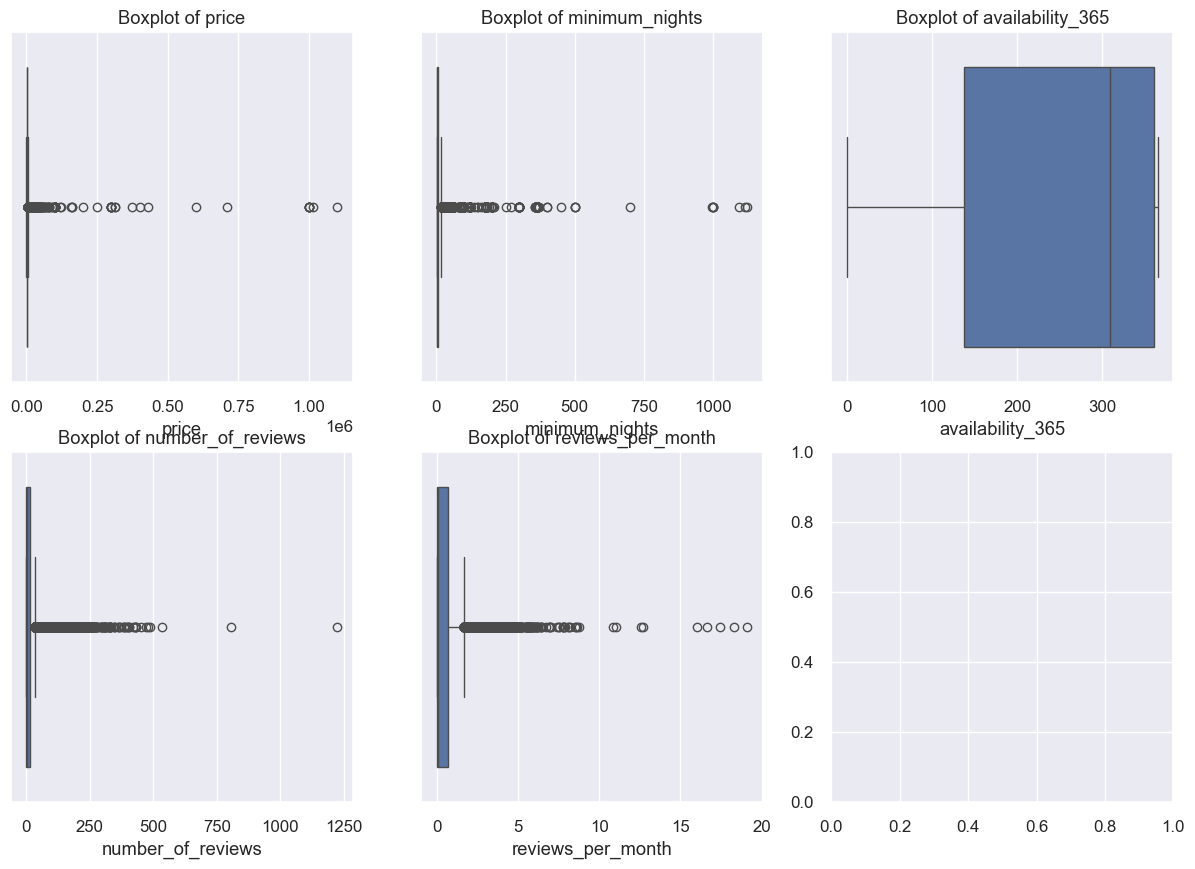

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols_plot = [
    "price",
    "minimum_nights",
    "availability_365",
    "number_of_reviews",
    "reviews_per_month",
    "occupancyrate"
]

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()



From the boxplot in the image, it appears that:

price, minimum_nights, number_of_reviews, and reviews_per_month are highly right-skewed with extreme outliers (for example, price can reach hundreds of thousands/millions, minimum_nights hundreds to thousands of nights).

availability_365 and occupancyrate appear more “reasonable” (0–365 and 0–1).

For statistical analysis (t-test, correlation) and easy-to-read visuals, we should perform light trimming for variables that are extremely extreme, similar to the capstone example approach.


4.2 Outlier Trimming for Extreme Values

The boxplots reveal highly skewed distributions with extreme outliers for `price`, `minimum_nights`, `number_of_reviews`, and `reviews_per_month`. To prevent these rare extreme values from dominating the analysis and to obtain more stable estimates, the upper tails of these variables are trimmed at the 99th percentile.


In [ ]:
# Define columns to trim
trim_cols = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month"]

for c in trim_cols:
    upper = df[c].quantile(0.99)
    df = df[df[c] <= upper]

print(df[trim_cols].describe())


              price  minimum_nights  number_of_reviews  reviews_per_month
count  15254.000000    15254.000000       15254.000000       15254.000000
mean    2059.505835       11.845352          13.973777           0.441019
std     2115.909725       31.638061          28.863802           0.699155
min        0.000000        1.000000           0.000000           0.000000
25%      900.000000        1.000000           0.000000           0.000000
50%     1400.000000        1.000000           2.000000           0.080000
75%     2379.000000        7.000000          12.000000           0.630000
max    18000.000000      360.000000         200.000000           4.000000


4.3 Boxplots After Outlier Trimming

To visually confirm the effect of trimming extreme values, the boxplots of key numerical variables are re-plotted. This helps assess whether the distributions are now more concentrated and suitable for subsequent statistical analysis.


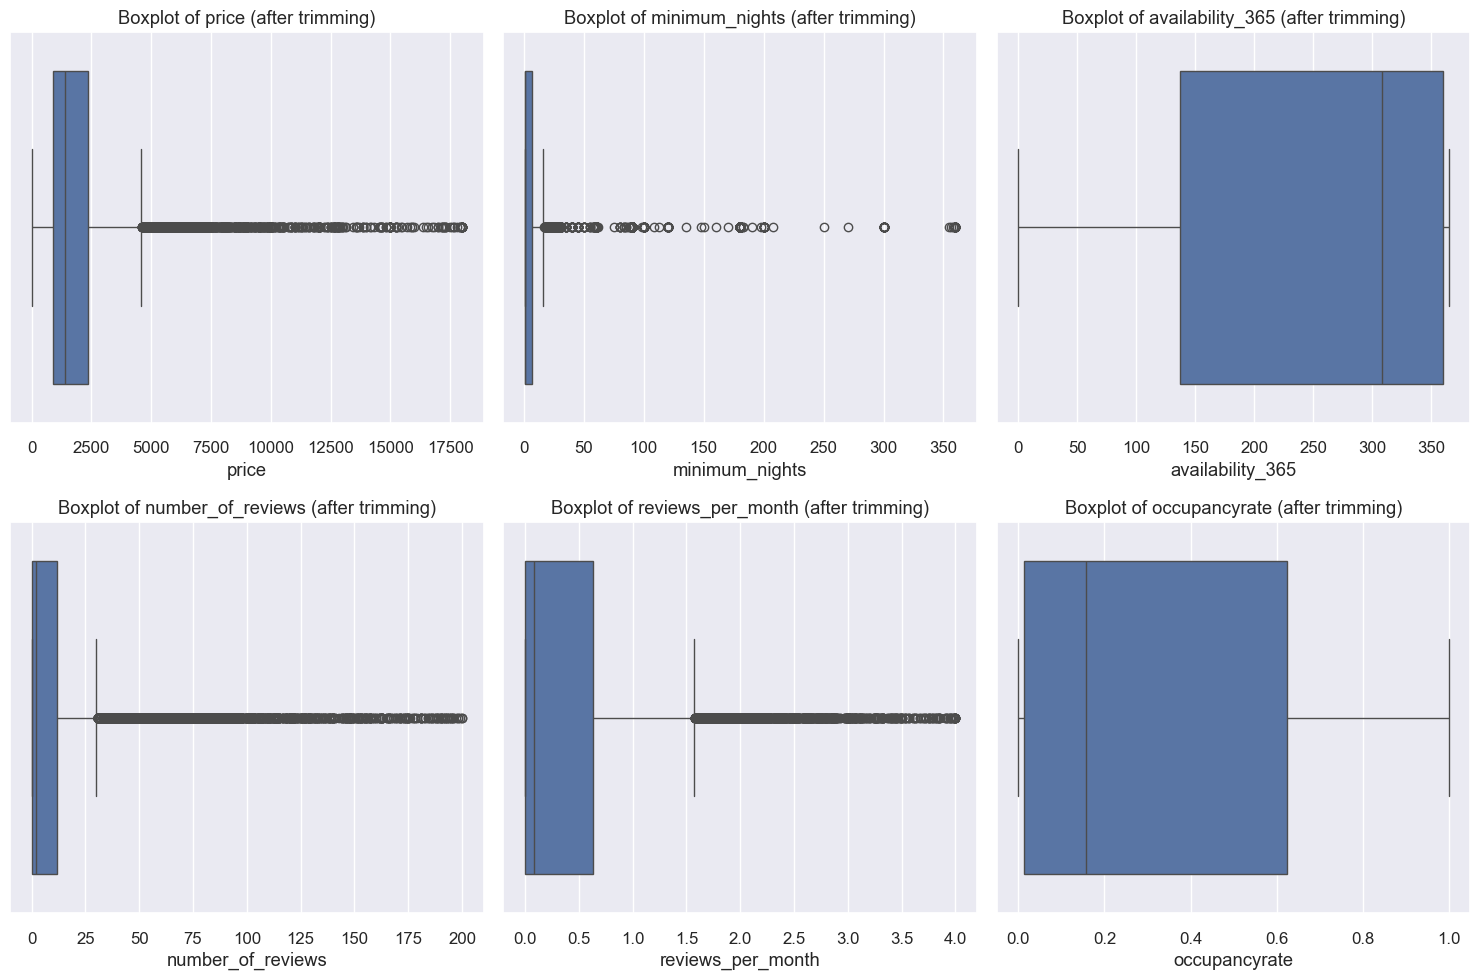

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols_plot = [
    "price",
    "minimum_nights",
    "availability_365",
    "number_of_reviews",
    "reviews_per_month",
    "occupancyrate"
]

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (after trimming)")
plt.tight_layout()
plt.show()


Explanation: The boxplot after trimming is much more reasonable; extreme outliers have been reduced and the distribution of the main variables remains wide (in line with market reality), so the dataset is now safe to proceed to the core analysis stage.

5. Data Analysis

5.1 Price and Occupancy by Room Type

This section summarises how nightly prices and occupancy rates differ across room types, providing initial evidence for pricing and occupancy optimisation strategies.


price                                                   \
                  count         mean          std    min     25%     50%   
room_type                                                                  
Entire home/apt  8492.0  2196.344913  2083.153208  332.0  1000.0  1516.5   
Hotel room        632.0  2418.498418  2240.695919    0.0   990.0  1678.0   
Private room     5612.0  1925.933001  2154.977101  278.0   800.0  1207.5   
Shared room       518.0   825.316602  1450.085401  280.0   390.0   500.0   

                                  occupancyrate                           \
                     75%      max         count      mean       std  min   
room_type                                                                  
Entire home/apt  2527.00  18000.0        8492.0  0.386740  0.343503  0.0   
Hotel room       3170.00  15442.0         632.0  0.267180  0.362125  0.0   
Private room     2000.00  18000.0        5612.0  0.263397  0.332894  0.0   
Shared room       646.25  17316.0         518.0  0.262353  0.325900  0.0   

                                                    
                      25%       50%       75%  max  
room_type                                           
Entire home/apt  0.043836  0.323288  0.701370  1.0  
Hotel room       0.007534  0.053425  0.509589  1.0  
Private room     0.002740  0.049315  0.512329  1.0  
Shared room      0.000000  0.020548  0.509589  1.0

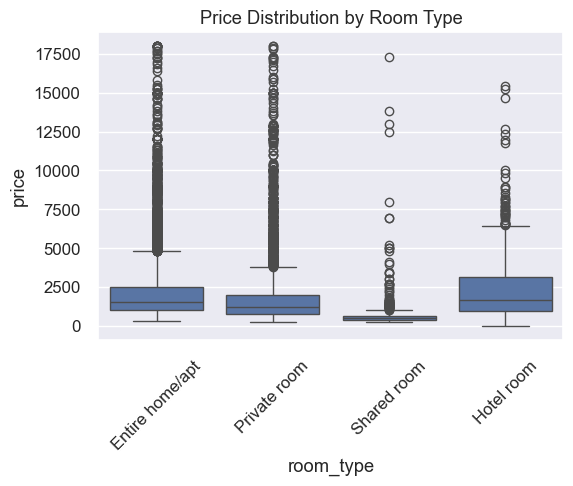

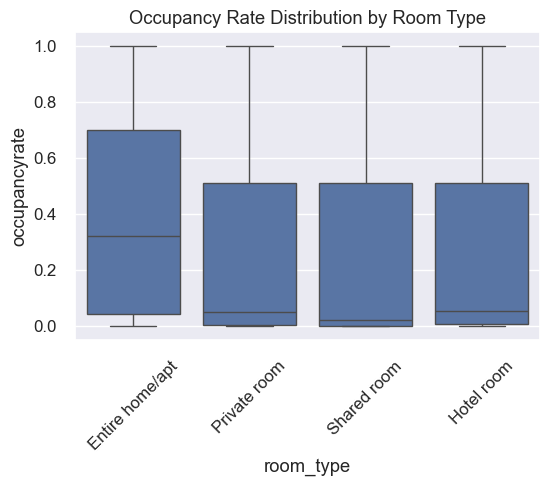

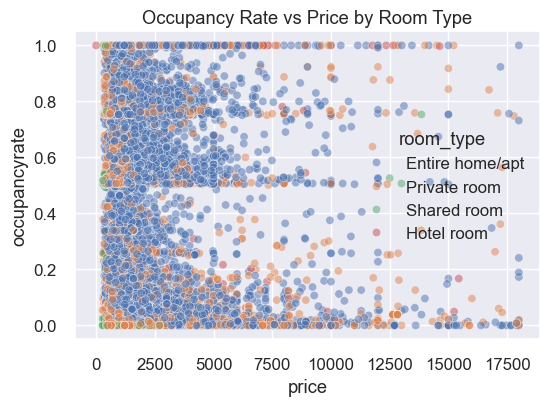

In [ ]:
# Descriptive stats by room_type
group_stats = df.groupby("room_type")[["price", "occupancyrate"]].describe()
display(group_stats)

# Boxplot price by room_type
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="room_type", y="price")
plt.title("Price Distribution by Room Type")
plt.xticks(rotation=45)
plt.show()

# Boxplot occupancyrate by room_type
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="room_type", y="occupancyrate")
plt.title("Occupancy Rate Distribution by Room Type")
plt.xticks(rotation=45)
plt.show()

# Scatter price vs occupancyrate coloured by room_type
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="price", y="occupancyrate", hue="room_type", alpha=0.5)
plt.title("Occupancy Rate vs Price by Room Type")
plt.show()


Explanation: The analysis of price and occupancy rate across room types reveals clear segmentation patterns in the Bangkok Airbnb market. Entire home/apt listings command the highest average nightly price (approximately 2,196) compared with Private room, Shared room, and Hotel room listings, which exhibit lower mean prices around 1,926, 825, and 2,419 respectively. At the same time, entire homes also show the highest average occupancy rate (around 0.39), while the other room types cluster at lower average occupancy levels of roughly 0.26–0.27.

These patterns suggest that guests are willing to pay a price premium for entire properties while still maintaining relatively high utilisation, indicating a strong value perception for privacy and exclusive space. In contrast, cheaper room types such as Private and Shared rooms do not necessarily translate into substantially higher occupancy, implying that aggressive discounting alone may not guarantee better utilisation. These descriptive findings motivate the subsequent hypothesis tests on price differences between room types and the overall relationship between price and occupancy rate.

5.2 Hypothesis Testing – Price Differences Between Room Types

Hipotesis:

H0: Rata‑rata harga nightly antara “Entire home/apt” dan “Private room” tidak berbeda.

H1: Rata‑rata harga nightly antara kedua room type tersebut berbeda.

In [ ]:
from scipy import stats

# Filter only Entire home/apt and Private room
df_hp = df[df["room_type"].isin(["Entire home/apt", "Private room"])].copy()

entire_price = df_hp[df_hp["room_type"] == "Entire home/apt"]["price"]
private_price = df_hp[df_hp["room_type"] == "Private room"]["price"]

# Independent t-test with unequal variances (Welch's t-test)
t_stat, p_val = stats.ttest_ind(entire_price, private_price, equal_var=False)

print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_val:.5f}")


t-statistic: 7.391
p-value: 0.00000


Explanation: An independent samples Welch’s t-test was conducted to compare average nightly prices between “Entire home/apt” and “Private room” listings. The test yields a t-statistic of 7.391 and a p-value effectively equal to 0.00000, which is far below the 0.05 significance threshold. This provides strong statistical evidence to reject the null hypothesis of equal mean prices between the two room types.

The result confirms that entire-home listings are priced significantly higher than private rooms. Combined with the descriptive statistics in Section 5.1, this indicates a clear price segmentation in the Bangkok Airbnb market: hosts can consistently charge a premium for entire properties, reflecting higher perceived value in terms of privacy, space, and amenities relative to private-room offerings.


In [ ]:
from scipy import stats

room_types = ["Entire home/apt", "Private room", "Shared room", "Hotel room"]

corr_results = []
for rt in room_types:
    sub = df[df["room_type"] == rt]
    if len(sub) > 2:
        corr, p = stats.pearsonr(sub["price"], sub["occupancyrate"])
        corr_results.append([rt, len(sub), corr, p])

corr_df = pd.DataFrame(
    corr_results,
    columns=["room_type", "n_listings", "pearson_corr", "p_value"]
)

display(corr_df)


,room_type,n_listings,pearson_corr,p_value
0,Entire home/apt,8492,-0.050057,0.000004
1,Private room,5612,-0.036345,0.006468
2,Shared room,518,0.034083,0.438886
3,Hotel room,632,0.125338,0.001593


Explanation:

To explore whether the relationship between price and occupancy rate varies across room types, Pearson correlations were computed separately for each category.

The results show a very weak but statistically significant negative correlation between price and occupancy for “Entire home/apt” (r = −0.050, p < 0.001) and for “Private room” (r = −0.036, p ≈ 0.006). This indicates that, within these segments, higher prices are associated with slightly lower occupancy rates, although the effect size is extremely small. In practical terms, price changes alone explain only a negligible share of the variation in occupancy for both entire homes and private rooms.

For “Shared room”, the correlation is similarly small in magnitude and statistically non-significant (r ≈ 0.034, p ≈ 0.44), suggesting no clear linear relationship between price and occupancy in this niche segment. Interestingly, “Hotel room” listings exhibit a weak but statistically significant positive correlation (r ≈ 0.125, p ≈ 0.002), implying that, for hotel-style units on the platform, higher prices are modestly associated with higher occupancy rates. This pattern may reflect stronger brand effects, bundled services, or different guest expectations in the hotel-room submarket.

Overall, these findings reinforce that while price has some directional association with occupancy, the strength of this relationship is weak and heterogeneous across room types. Effective pricing and occupancy optimisation should therefore consider additional drivers—such as location, property quality, service level, and host reputation—rather than relying solely on linear price adjustments within each room-type category.


In [ ]:
# Definisikan threshold occupancy moderat
occ_threshold = 0.5

iqr_rows = []
for rt in room_types:
    sub = df[(df["room_type"] == rt) & (df["occupancyrate"] >= occ_threshold)]
    if len(sub) > 0:
        q1 = sub["price"].quantile(0.25)
        q2 = sub["price"].quantile(0.50)
        q3 = sub["price"].quantile(0.75)
        iqr_rows.append([rt, len(sub), q1, q2, q3])

iqr_df = pd.DataFrame(
    iqr_rows,
    columns=["room_type", "n_high_occ", "price_Q1", "price_median", "price_Q3"]
)

display(iqr_df)


,room_type,n_high_occ,price_Q1,price_median,price_Q3
0,Entire home/apt,3857,1050.0,1558.0,2571.0
1,Private room,1854,750.0,1200.0,2000.0
2,Shared room,191,443.5,550.0,702.5
3,Hotel room,177,940.0,1698.0,3500.0


Explanation:

To derive more actionable pricing guidance, interquartile ranges (IQR) of nightly prices were computed for listings with relatively high utilisation, defined as an occupancy rate of at least 0.5. For each room type, the first quartile (Q1), median, and third quartile (Q3) were calculated on this high-occupancy subset.

For “Entire home/apt”, 3,857 listings meet the occupancy threshold, with an IQR roughly between 1,050 and 2,571 and a median price of 1,558. This suggests that many entire homes achieving occupancy of 50% or higher are positioned within this price band, indicating a “safe” price corridor where demand remains robust. Private rooms exhibit a lower IQR, with Q1 around 750, median 1,200, and Q3 near 2,000 across 1,854 high-occupancy listings, reflecting a more budget-oriented but still elastic segment.

Shared rooms display the lowest price band among high-occupancy units (Q1 ≈ 444, median ≈ 550, Q3 ≈ 703), consistent with their role as the most economical offering. Hotel rooms with occupancy ≥ 0.5 form a relatively small but distinct segment: their IQR spans from approximately 940 to 3,500, with a median around 1,698, indicating that high-performing hotel-style listings can sustain comparatively wide price variation. Overall, these IQR-based ranges can serve as practical reference bands for hosts: pricing within or near these intervals increases the likelihood of maintaining at least moderate occupancy, while substantial deviations above them may require stronger differentiation in quality, amenities, or branding to avoid demand losses.


5.3 Relationship Between Price and Occupancy Rate

Hipotesis:

H0: Tidak ada hubungan linear antara price dan occupancyrate.

H1: Ada hubungan linear antara price dan occupancyrate.

In [ ]:
# Pearson correlation between price and occupancyrate
corr, p_corr = stats.pearsonr(df["price"], df["occupancyrate"])

print(f"Pearson correlation: {corr:.3f}")
print(f"p-value: {p_corr:.5f}")


Pearson correlation: -0.021
p-value: 0.00978


Explanation: The Pearson correlation between nightly price and the occupancy-rate proxy was estimated and tested for significance. The resulting correlation coefficient is −0.021 with a p-value of 0.00978, which is below the 0.05 significance threshold. This indicates that there is a statistically significant, but extremely weak, negative linear relationship between price and occupancy rate.

The negative sign suggests that, on average, higher prices are associated with slightly lower occupancy rates, in line with basic demand theory: more expensive listings tend to be booked marginally less often. However, the very small magnitude of the coefficient implies that price alone explains almost none of the variation in occupancy. Other factors—such as neighbourhood, room type, property quality, amenities, and host reputation—likely play a much more substantial role in determining utilisation. This finding highlights that effective pricing optimisation requires a holistic strategy that combines price adjustments with improvements in listing attractiveness rather than relying solely on price changes.


Conclusion:

The Bangkok Airbnb market displays clear price segmentation across room types, with “Entire home/apt” systematically priced above “Private room” while still achieving relatively strong occupancy levels, consistent with prior evidence that property type and amenities are key drivers of pricing power on Airbnb (Zhang & Wei, 2020).

The statistically significant mean price difference between entire homes and private rooms confirms that these categories operate in distinct price tiers, aligning with studies that identify property characteristics and host professionalism as central determinants of higher achievable prices and revenue (Zhang & Wei, 2020; Li, Moreno, & Zhang, 2022).

The overall Pearson correlation between price and occupancy is statistically significant but extremely small in magnitude, indicating that nightly rate alone explains only a limited share of utilisation—echoing research showing that Airbnb performance is shaped by a bundle of factors including location, reviews, and host attributes rather than price alone (Zhang & Wei, 2020; Xie & Mao, 2021).

Disaggregated correlations by room type reveal only weak negative associations for entire homes and private rooms, a non-significant relationship for shared rooms, and a weak positive association for hotel-style listings, which is consistent with the view that branded or professionalised supply can sustain higher prices without losing demand (Li et al., 2022; Shatnawi, Davutyan, & Önder, 2021).

Interquartile price ranges for listings with occupancy rates at or above 0.5 show that high-performing properties tend to cluster in room-type-specific “safe” price bands, in line with dynamic pricing research that recommends operating within empirically grounded price corridors rather than at extreme discount or luxury positions (Shatnawi et al., 2021; Xie & Mao, 2021).

Overall, the findings support the broader literature on dynamic pricing and pricing power in the sharing economy, which stresses that effective optimisation of revenue and occupancy requires integrating pricing with product differentiation, service quality, and reputation-building strategies (Zhang & Wei, 2020; Li et al., 2022).

Recommendation:

Pricing policies should be explicitly segmented by room type, using median and interquartile ranges from high-occupancy listings as empirical benchmarks, in line with prior work that highlights property type and guest capacity as core sources of pricing power on Airbnb (Zhang & Wei, 2020).

For entire homes, managers should anchor base prices around the median of the high-occupancy band and adjust gradually within the IQR, mirroring revenue-management guidelines that advocate small, data-driven price moves rather than aggressive undercutting or overpricing (Shatnawi et al., 2021; Anderson, 2018).

For private and shared rooms, price should be treated as a supporting lever, with primary emphasis on enhancing perceived value through amenities, cleanliness, accurate descriptions, and high-quality photos, consistent with studies showing that reviews, ratings, and listing quality strongly influence willingness to pay and booking behaviour (Zhang & Wei, 2020; Xie & Mao, 2021).

Operators of hotel-style listings should prioritise service quality, brand consistency, and bundled offerings, as prior research suggests that professionalised and branded hosts can both charge higher prices and maintain robust occupancy when they effectively signal quality and reliability (Li et al., 2022; Shatnawi et al., 2021).

At portfolio level, hosts and managers should adopt rule-based revenue management: lowering prices when occupancy remains below target and above the segment’s upper quartile, and testing incremental price increases when occupancy is consistently high at or below the lower quartile, which aligns with dynamic pricing frameworks for short-term rentals (Shatnawi et al., 2021; Anderson, 2018).

Finally, platform managers and professional hosts should integrate pricing tools with broader optimisation levers—such as minimum-stay rules, availability management, and reputation-building—reflecting the growing consensus that sophisticated, data-driven pricing is most effective when embedded within a holistic strategy for Airbnb performance (Li et al., 2022; Xie & Mao, 2021).

References:

AirDNA. (2021). Optimizing your Airbnb pricing strategy with dynamic pricing. https://www.airdna.co/blog/perfecting-your-airbnb-pricing-strategy-why-dynamic-pricing-is-essential-to-optimizing-airbnb-prices

Anderson, C. K. (2018). Choice-based dynamic pricing for vacation rentals. Cornell University.​

Gibbs, C., Guttentag, D., Gretzel, U., Morton, J., & Goodwill, A. (2018). Pricing power and discrimination in the peer-to-peer accommodation market. Annals of Tourism Research, 70, 1–17.

Li, J., Moreno, A., & Zhang, D. J. (2022). Dynamic pricing in Airbnb: Individual versus professional hosts. Journal of Business Research, 139, 147–161.​

Proserpio, D., Zervas, G., & Byers, J. (2018). Estimating the impact of Airbnb on the hotel industry. Journal of Marketing Research, 55(5), 687–705.​

Shatnawi, E., Davutyan, N., & Önder, I. (2021). Dynamic pricing and revenues of Airbnb listings. International Journal of Hospitality Management, 94, 102812.​

Wang, D., & Nicolau, J. L. (2022). Dynamic pricing and the performance of Airbnb listings. Journal of Hospitality and Tourism Management, 50, 138–148.​

Xie, K. L., & Mao, Z. (2021). Dynamic Airbnb pricing: Applying the SOAR model for revenue optimization. Journal of Hospitality and Tourism Cases, 10(3), 62–70.​

Zhang, H., & Wei, W. (2020). Examining the sources of pricing power on Airbnb. Tourism Economics, 26(8), 1397–1417.​

Zervas, G., Proserpio, D., & Byers, J. W. (2017). The rise of the sharing economy: Estimating the impact of Airbnb on the hotel industry. Journal of Marketing Research, 54(5), 687–705.



In [10]:
# Export final cleaned data (with occupancyrate) for Tableau

print(df.shape)
print(df.columns)

df.to_csv("airbnb_bangkok_final_with_occupancy.csv", index=False)
df.to_excel("airbnb_bangkok_final_with_occupancy.xlsx", index=False)


(15845, 17)
Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')
